In [1]:
#import pandas and load datasets
import pandas as pd

transactions = pd.read_excel("QVI_transaction_data.xlsx")
behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

In [2]:
#examine transactions dataset - top 5 rows (and see the column names)
transactions.head()

#looks like prod_name can be split into brand, flavour and weight, perhaps split by spaces
#looks like the first row has a missing space at the end of product name
#some products may be harder to split than expected

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
#examine purchase behaviour datasets
behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
#check if any values are missing
transactions.isnull().sum()

#seems there are no missing values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
#check the data types
transactions.dtypes

#all numeric data except product name, as expected - no data quality issues except date

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [6]:
#convert date to a date/time format
#excel starts at 1899-12-30
transactions["DATE"] = pd.to_datetime(transactions["DATE"], unit='D', origin='1899-12-30')

In [7]:
#5 number summary
transactions.describe()

#there is an outlier, prod_qty/tot_sales really high, examine

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [8]:
transactions.loc[transactions["PROD_QTY"]==200]

#customer has bought a huge amount twice

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [53]:
transactions.loc[transactions["LYLTY_CARD_NBR"]==226000]

#no other transactions, very much an outlier, perhaps a commercial buyer

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [9]:
#remove the rows
transactions = transactions.drop([69762, 69763], axis=0)

In [10]:
#check summary again
transactions.describe()

#looks good now

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [11]:
#count words used
words = transactions["PROD_NAME"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0)

#lots of salsa entries

In [12]:
#drop all rows containing salsa(we are only looking at chip sales)
transactions = transactions.loc[~transactions["PROD_NAME"].str.contains("Salsa")]

In [13]:
#look at brand names
transactions["PROD_NAME"].str.split(' ').str[0].unique()

#there's some redundnacies or some brands have multiple words, clean after adding attribute
#GrnWves = Grain (Waves has been cut off)
#Dorito = Doritos
#NCC = Natural Chip Company
#WW = Woolworths
#RRD = Red Rock Deli
#Infzns = Infuzions
#Smith = Smiths
#Snbts = Sunbites
#French = French Fries
#Burger = Burger Rings

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [14]:
#Create new attribute and rename things to clean the data - using full name for better clarity
transactions["BRAND"] = transactions["PROD_NAME"].str.split(' ').str[0]
transactions.loc[transactions["BRAND"]=="GrnWves","BRAND"] = "Grain Waves"
transactions.loc[transactions["BRAND"]=="Grain","BRAND"] = "Grain Waves"
transactions.loc[transactions["BRAND"]=="Dorito","BRAND"] = "Doritos"
transactions.loc[transactions["BRAND"]=="NCC","BRAND"] = "Natural"
transactions.loc[transactions["BRAND"]=="Natural","BRAND"] = "Natural Chip Company"
transactions.loc[transactions["BRAND"]=="WW","BRAND"] = "Woolworths"
transactions.loc[transactions["BRAND"]=="RRD","BRAND"] = "Red Rock Deli"
transactions.loc[transactions["BRAND"]=="Red","BRAND"] = "Red Rock Deli"
transactions.loc[transactions["BRAND"]=="Infzns","BRAND"] = "Infuzions"
transactions.loc[transactions["BRAND"]=="Smith","BRAND"] = "Smiths"
transactions.loc[transactions["BRAND"]=="Snbts","BRAND"] = "Sunbites"
transactions.loc[transactions["BRAND"]=="French","BRAND"] = "French Fries"
transactions.loc[transactions["BRAND"]=="Burger","BRAND"] = "Burger Rings"

In [15]:
transactions.groupby(["BRAND"])["PROD_QTY"].sum()

BRAND
Burger Rings             2970
CCs                      8609
Cheetos                  5530
Cheezels                 8747
Cobs                    18571
Doritos                 48331
French Fries             2643
Grain Waves             14726
Infuzions               27119
Kettle                  79051
Natural Chip Company    14106
Pringles                48019
Red Rock Deli           30891
Smiths                  57582
Sunbites                 5692
Thins                   26929
Tostitos                18134
Twisties                18118
Tyrrells                12298
Woolworths              22333
Name: PROD_QTY, dtype: int64

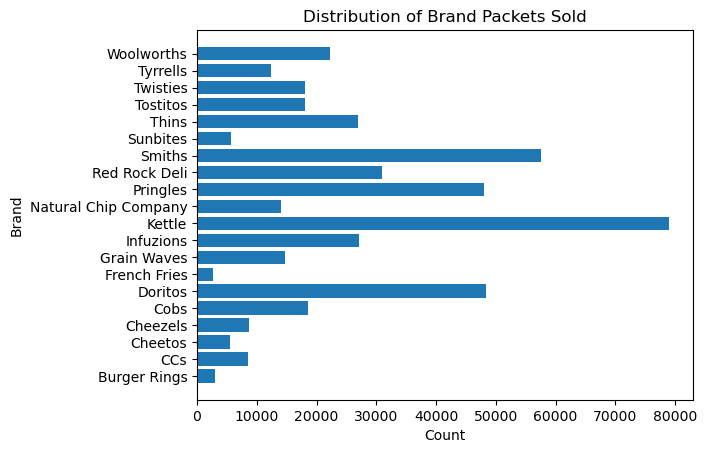

In [16]:
import matplotlib.pyplot as plt
brand_sales = transactions.groupby(["BRAND"])["PROD_QTY"].sum()
plt.barh(brand_sales.index, brand_sales.values)
plt.title('Distribution of Brand Packets Sold')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

In [17]:
#look at weights
transactions["PROD_NAME"].str.split(' ').str[-1].unique()

#There are some that are missing a space so this needs to be cleaned up too
#one has no weight, investigate

array(['SeaSalt175g', '175g', '170g', '150g', '330g', '210g', '210G',
       '270g', '220g', '125g', '110g', '134g', '150G', 'Chli&S/Cream175G',
       'Chckn175g', '380g', 'Chicken270g', '180g', '165g', 'Salt', '250g',
       'Chs&Onion170g', '200g', '160g', 'CutSalt/Vinegr175g', '190g',
       '90g', '70g'], dtype=object)

In [18]:
transactions.loc[transactions["PROD_NAME"].str.split(' ').str[-1]=="Salt", "PROD_NAME"].unique()
#Only 1 product, Kettle 135g

array(['Kettle 135g Swt Pot Sea Salt'], dtype=object)

In [19]:
#Create new attribute weight and clean the data
transactions["GRAMS"] = transactions["PROD_NAME"].str.split(' ').str[-1]
transactions.loc[transactions["GRAMS"]=="SeaSalt175g","GRAMS"] = "175g"
transactions.loc[transactions["GRAMS"]=="Ht300g","GRAMS"] = "300g"
transactions.loc[transactions["GRAMS"]=="Chicken270g","GRAMS"] = "270g"
transactions.loc[transactions["GRAMS"]=="Salt","GRAMS"] = "135g"
transactions.loc[transactions["GRAMS"]=="Chckn175g","GRAMS"] = "175g"
transactions.loc[transactions["GRAMS"]=="150G","GRAMS"] = "150g"
transactions.loc[transactions["GRAMS"]=="210G","GRAMS"] = "210g"
transactions.loc[transactions["GRAMS"]=="Chli&S/Cream175G","GRAMS"] = "175g"
transactions.loc[transactions["GRAMS"]=="Chs&Onion170g","GRAMS"] = "170g"
transactions.loc[transactions["GRAMS"]=="CutSalt/Vinegr175g","GRAMS"] = "175g"

In [20]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,GRAMS
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Company,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150g


In [21]:
#convert grams to numeric value(could be helpful)
transactions["GRAMS"] = transactions["GRAMS"].str.rstrip("g").astype(int)

In [22]:
transactions["GRAMS"].describe()

#looks good, smallest chip packet is 70g, largest is 380g

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: GRAMS, dtype: float64

In [23]:
transactions.groupby(["GRAMS"])["PROD_QTY"].sum().sort_values()

GRAMS
125      2730
180      2764
70       2855
220      2970
160      5604
190      5673
90       5692
250      6069
135      6212
200      8425
210     11962
270     12049
380     12273
330     23999
165     29051
170     38088
110     42835
134     48019
150     76662
175    126467
Name: PROD_QTY, dtype: int64

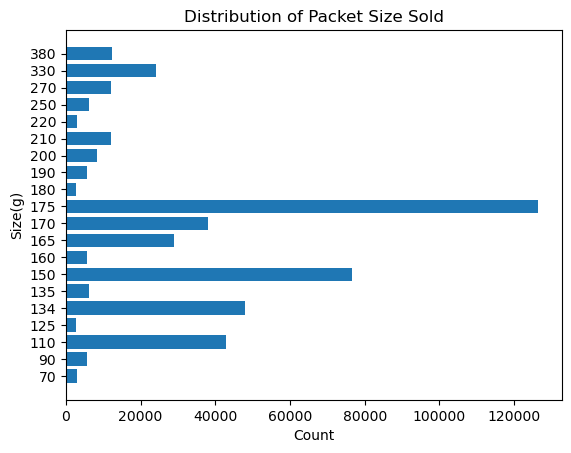

In [24]:
gram_sales = transactions.groupby(["GRAMS"])["PROD_QTY"].sum()
plt.barh(gram_sales.index.astype(str), gram_sales.values)
plt.title('Distribution of Packet Size Sold')
plt.xlabel('Count')
plt.ylabel('Size(g)')
plt.show()

In [25]:
transactions["DATE"].value_counts().describe()
#some days sell a fair bit less than others
#one day is missing

count    364.000000
mean     677.857143
std       33.687536
min      607.000000
25%      658.000000
50%      674.000000
75%      694.250000
max      865.000000
Name: DATE, dtype: float64

In [32]:
pd.date_range(start="2018-07-01", end="2019-06-30").difference(transactions["DATE"])
#missing day is christmas day

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

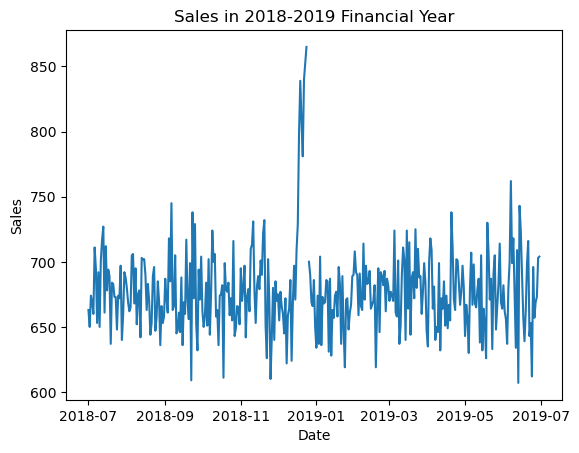

In [61]:
#append missing day with sales=NaN for graphing 
import matplotlib.pyplot as plt
import numpy as np
plt.plot(transactions["DATE"].value_counts().append(pd.Series([np.nan], index=pd.to_datetime(["2018-12-25"]))).sort_index())
plt.title('Sales in 2018-2019 Financial Year')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()
#graph shows that sales dramatically increase during christmas season

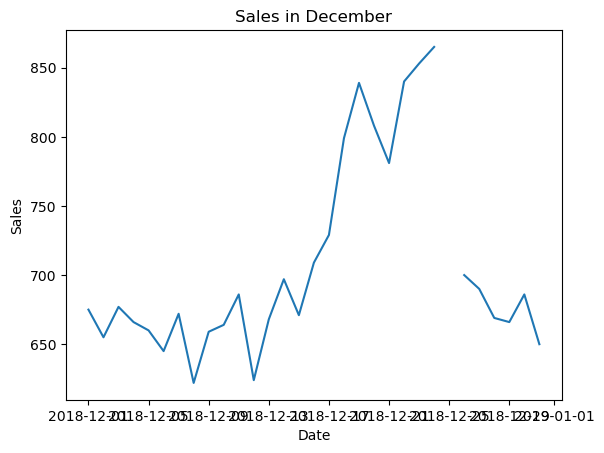

In [60]:
#focus on December
plt.plot(transactions.loc[(transactions["DATE"] > "2018-11-30") & (transactions["DATE"] < "2019-01-01")]["DATE"].value_counts().append(pd.Series([np.nan], index=pd.to_datetime(["2018-12-25"]))).sort_index())
plt.title('Sales in December')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

#sales increase reaching a peak on christmas eve, then goes back down after christmas day

In [57]:
transactions.groupby(["STORE_NBR"])["PROD_QTY"].sum().sort_values()

#some stores don't really sell chips, while some sell lots of packs

STORE_NBR
11        2
76        2
92        2
252       2
206       2
       ... 
93     3372
237    3376
165    3448
88     3544
226    3793
Name: PROD_QTY, Length: 271, dtype: int64

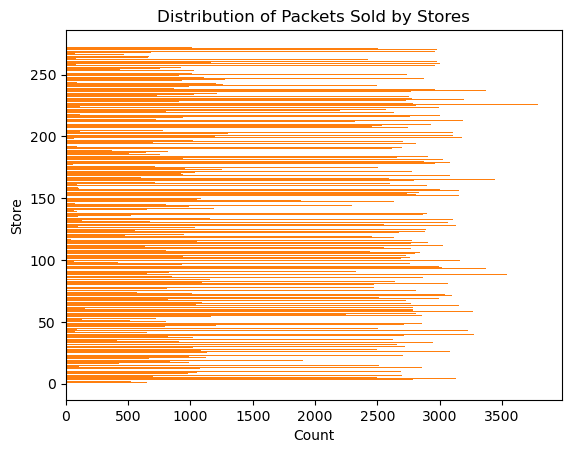

In [59]:
store_sales = transactions.groupby(["STORE_NBR"])["PROD_QTY"].sum()
plt.barh(store_sales.index, store_sales.values)
plt.title('Distribution of Packets Sold by Stores')
plt.xlabel('Count')
plt.ylabel('Store')
plt.show()

In [6]:
#check if any values are missing
behaviour.isnull().sum()

#seems there are no missing values

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
#check the data types
behaviour.dtypes

#datatypes are as expected

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [76]:
behaviour.groupby(["LIFESTAGE"])["LIFESTAGE"].count()

LIFESTAGE
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
OLDER FAMILIES             9780
OLDER SINGLES/COUPLES     14609
RETIREES                  14805
YOUNG FAMILIES             9178
YOUNG SINGLES/COUPLES     14441
Name: LIFESTAGE, dtype: int64

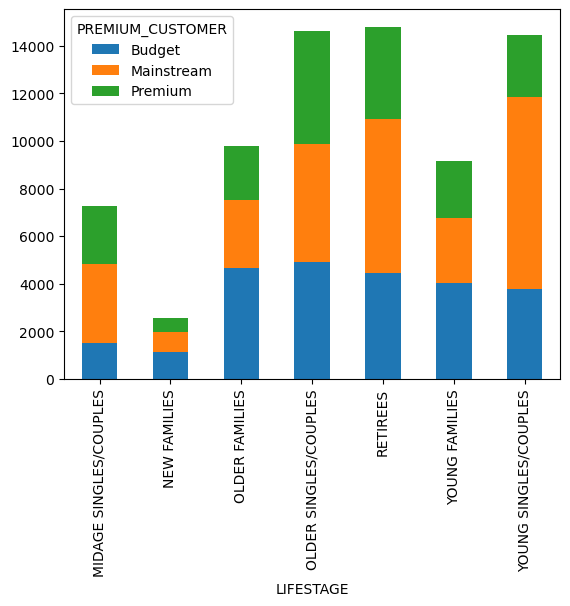

In [97]:
behaviour.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["LIFESTAGE"].count().unstack("PREMIUM_CUSTOMER").fillna(0).plot.bar(stacked=True)
plt.show()

In [103]:
#join data based on loyalty card number
df = pd.merge(transactions, behaviour, on="LYLTY_CARD_NBR")

#drop columns we won't use
df = df.drop(["TXN_ID","PROD_NBR","PROD_NAME"], axis="columns")

In [104]:
#check if merged correctly
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_QTY,TOT_SALES,BRAND,GRAMS,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,2,6.0,Natural Chip Company,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,2,3.8,Woolworths,160,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,1,2.1,CCs,175,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget


In [106]:
#check for transactions that didn't have an associated loyalty number
df["PREMIUM_CUSTOMER"].unique()

#seems all rows have been joined correctly,

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

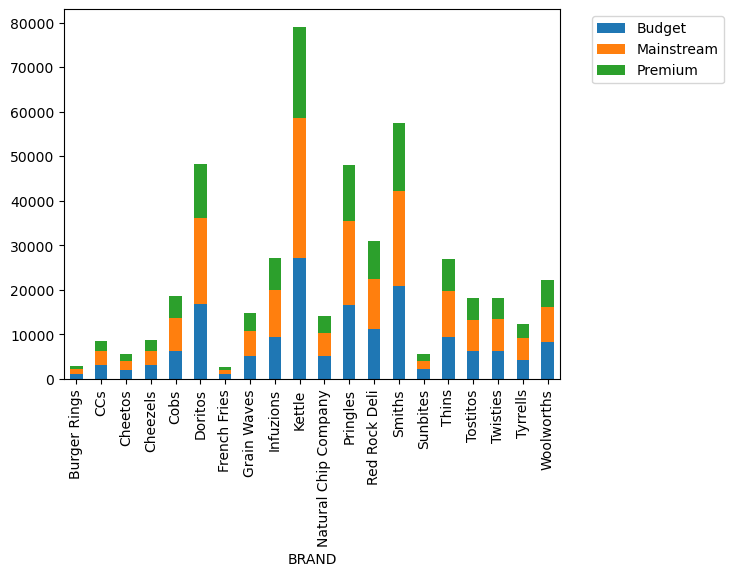

In [123]:
#checking what type of customers buy what type of chips
brand_by_premium = df.groupby(["BRAND","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
brand_by_premium.unstack("PREMIUM_CUSTOMER").fillna(0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [128]:
brand_by_premium.sort_values().sort_values(ascending=False)

BRAND                 PREMIUM_CUSTOMER
Kettle                Mainstream          31334
                      Budget              27200
Smiths                Mainstream          21346
                      Budget              20953
Kettle                Premium             20517
Doritos               Mainstream          19310
Pringles              Mainstream          18861
Doritos               Budget              16796
Pringles              Budget              16541
Smiths                Premium             15283
Pringles              Premium             12617
Doritos               Premium             12225
Red Rock Deli         Budget              11316
                      Mainstream          11228
Infuzions             Mainstream          10584
Thins                 Mainstream          10402
                      Budget               9418
Infuzions             Budget               9408
Woolworths            Budget               8386
Red Rock Deli         Premium              8347
W

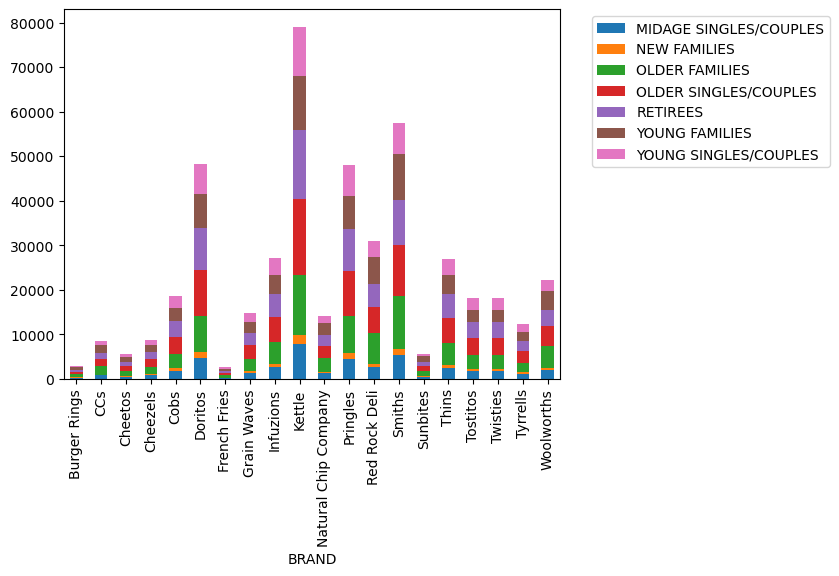

In [127]:
brand_by_lifestage = df.groupby(["BRAND","LIFESTAGE"])["PROD_QTY"].sum()
brand_by_lifestage.unstack("LIFESTAGE").fillna(0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [122]:
brand_by_lifestage.sort_values().sort_values(ascending=False)

BRAND         LIFESTAGE            
Kettle        OLDER SINGLES/COUPLES    8847
              RETIREES                 8194
              OLDER FAMILIES           6851
              YOUNG FAMILIES           6277
Smiths        OLDER FAMILIES           6138
                                       ... 
CCs           NEW FAMILIES               93
Cheetos       NEW FAMILIES               62
Sunbites      NEW FAMILIES               61
Burger Rings  NEW FAMILIES               40
French Fries  NEW FAMILIES               32
Name: BRAND, Length: 140, dtype: int64

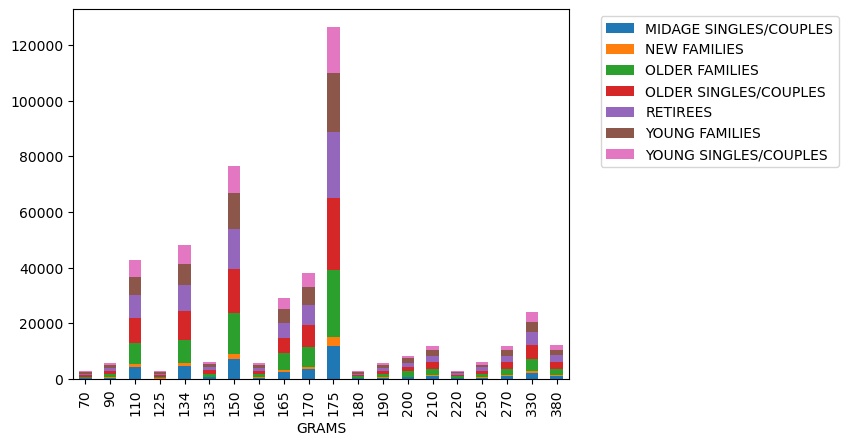

In [130]:
#check if customer types buy different sized bags
size_by_lifestage = df.groupby(["GRAMS","LIFESTAGE"])["PROD_QTY"].sum()
size_by_lifestage.unstack("LIFESTAGE").fillna(0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

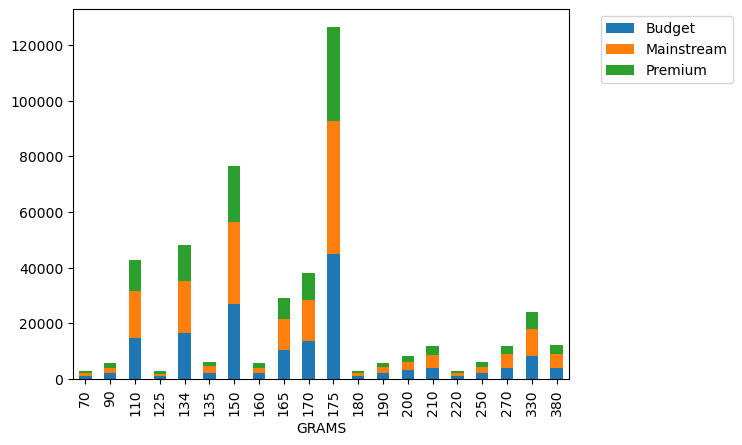

In [131]:
size_by_premium = df.groupby(["GRAMS","PREMIUM_CUSTOMER"])["PROD_QTY"].sum()
size_by_premium.unstack("PREMIUM_CUSTOMER").fillna(0).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

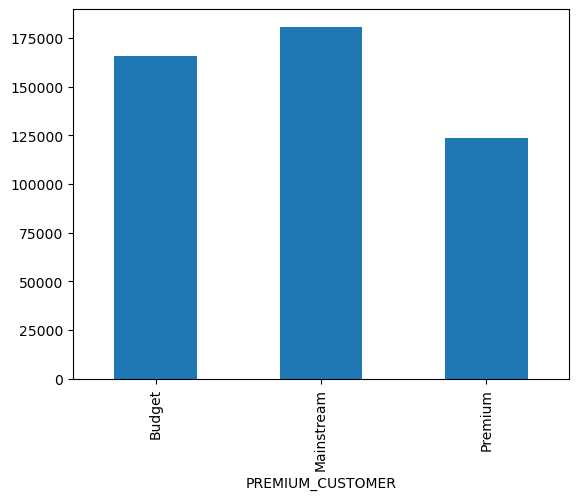

In [132]:
df.groupby(["PREMIUM_CUSTOMER"])["PROD_QTY"].sum().plot.bar()
plt.show()

#premium customers are much less likely to buy chips compared to budget customers despite their higher disposable income